In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Pravimo klasu LinearRegressionUsingGD koja će sadržati 3 metode: za inicijalizaciju, za obuku modela i za primenu modela (predikcija vrednosti izlaza za novi uzorak).

$ y_{pred}=x \cdot w $

$ r = y_{pred} - y $

$ g = x \cdot r $

$ w = w - \frac{\eta}{m} * g $

$ J = \frac{1}{2m}\sum{r^2} $

In [ ]:
class LinearRegressionUsingGD:
    """
    eta : Brzina ucenja
    n_iterations : Broj iteracija algoritma

    w_ : koeficijenti obucenog modela
    cost_ : vrednost funkcije cene
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """
        Ulazni parametri
        -------
        x : numpy array, shape = [n_samples, n_features]
            Trening uzorci
        y : numpy array, shape = [n_samples, n_target_values]
            Ciljne vrednosti izlaza + np.random.rand(50, 1)

        Izlazni parametri
        -------
        self : object (obučen model)
        """

        self.cost_ = []
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0] #broj uzoraka

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """
        Ulazni parametri
        ----------
        x : numpy array, shape = [n_samples, n_features]
            Test uzorci
        Izlazni parametri
        -------
        Predviđene vrednosti zavisne promenljive
        """
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)

        return np.dot(x, self.w_)

Generišemo jednodimenzionalni skup podataka (uređeni parovi (x,y)).

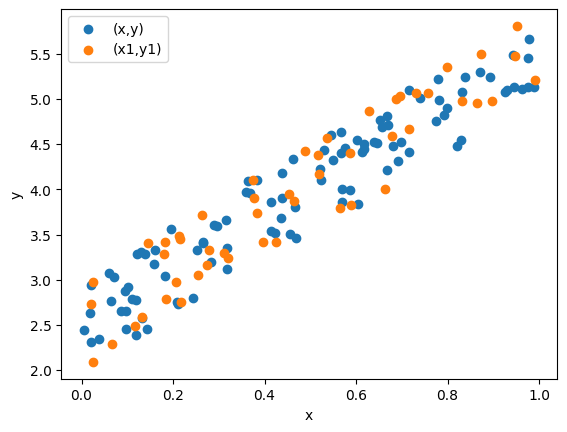

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

x1 = np.random.rand(50, 1)
y1 = 2 + 3 * x1 + np.random.rand(50, 1)

# plot
plt.scatter(x,y,label='(x,y)')
plt.scatter(x1,y1,label='(x1,y1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Obučavamo model lin.regresije koristeći podatke za obuku (uređene parove (x,y)). Potom koristeći obučen model vršimo predviđanje izlaza, kako za test uzorke (x1), tako i za uzorke za obuku (x).

In [ ]:
linear_regression_model = LinearRegressionUsingGD()
linear_regression_model.fit(x, y)
y_pred = linear_regression_model.predict(x)
y1_pred = linear_regression_model.predict(x1)

Koristeći prave vrednosti (y i y1) i predviđene vrednosti (y_pred i y1_pred) procenjujemo grešku modela na skupu za obuku i na  test skupu, koristeći nekoliko standardnih mera za procenu greške regresionih modela.

In [ ]:
# residual sum of squares
rss = np.sum((y_pred - y)**2)
rss1 = np.sum((y1_pred - y1)**2)

#  total sum of squares
tss = np.sum((y - np.mean(y))**2)
tss1 = np.sum((y1 - np.mean(y1))**2)

# R2 score
r2_score = 1 - (rss/tss)
print('R2 score trng: ', r2_score)
r2_score1 = 1 - (rss1/tss1)
print('R2 score test: ', r2_score1)

R2 score trng:  0.9036464134445802
R2 score test:  0.8784585259249473


Proveravamo koji su dobijeni koeficijenti za obučeni model linearne regresije.

In [ ]:
coeffs = linear_regression_model.w_
print(coeffs)

[[2.89114079]
 [2.58109277]]


Iscrtavamo promenu funkcije cene tokom obuke modela.

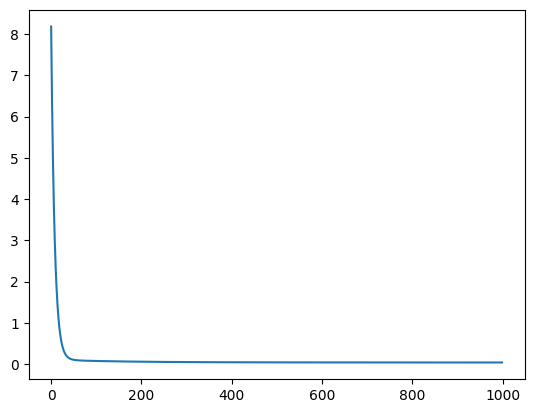

In [ ]:
cost_function = linear_regression_model.cost_

fig=plt.figure()
plt.plot(np.arange(len(cost_function)), cost_function)

Poredimo grafički prave i predviđene vrednosti iz test skupa.

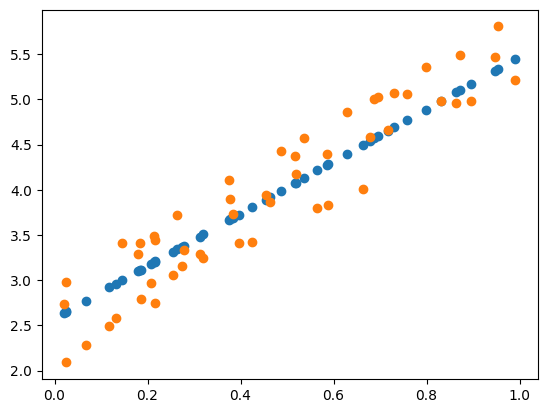

In [ ]:
plt.scatter(x1,y1_pred)
plt.scatter(x1,y1)